# 1.0 importando Bibliotecas

In [10]:
from datetime import datetime
import pandas as pd
from pandas_datareader import data as web
import numpy as np
import matplotlib.pyplot as plt
import math
!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
plt.style.use("dark_background")


# 2.0 Capturando os dados

In [11]:
stocks=["AAPL","TSLA","GOOG","PETR4.SA","VALE3.SA","AMZN","NKLA"]
x=1/(len(stocks))
pesos=[]
for a in range(len(stocks)):
  pesos.append(x)
pesos=np.array(pesos)
inicio="2016-01-01"
final=datetime.today().strftime("%Y-%m-%d")

# 3.0 Armazenando dados

In [12]:
df = pd.DataFrame()
for stock in stocks:
  df[stock]=web.DataReader(stock, data_source="yahoo",start=inicio, end=final)["Adj Close"]

# 4.0 Plotando a Cotação

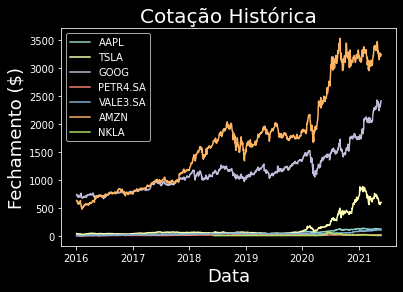

In [13]:

ações=df
title="Cotação Histórica"
for x in ações.columns.values:
  plt.plot(ações[x], label=x)
plt.title(title,fontsize=20)
plt.xlabel("Data", fontsize=18)
plt.ylabel("Fechamento ($)",fontsize=18)
plt.legend(ações.columns.values, loc="upper left")

plt.show()

In [14]:
retornos_diarios = df.pct_change()
retornos_diarios

,AAPL,TSLA,GOOG,PETR4.SA,VALE3.SA,AMZN,NKLA
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,0.000090,0.000998,-0.027656,-0.013396,-0.005024,NaN
2016-01-06,-0.019570,-0.019648,0.001400,-0.041916,-0.073482,-0.001799,NaN
2016-01-07,-0.042205,-0.015477,-0.023170,-0.021875,-0.059483,-0.039058,NaN
2016-01-08,0.005288,-0.021563,-0.016410,0.001597,-0.033914,-0.001464,NaN
...,...,...,...,...,...,...,...
2021-05-19,-0.001282,-0.024936,0.002292,-0.007590,-0.020506,-0.000148,-0.061818
2021-05-20,0.021012,0.041387,0.020522,-0.008413,-0.010156,0.004914,-0.010077
2021-05-21,-0.014767,-0.010055,-0.004665,0.000771,-0.015390,-0.013733,-0.061864


# 5.0 Matriz de Covâriancia & Volatilidade

In [15]:
matrizcov=retornos_diarios.cov()*252 # Covariância anual
matrizcov # é interessante demonstrar a matriz de covariância

,AAPL,TSLA,GOOG,PETR4.SA,VALE3.SA,AMZN,NKLA
AAPL,0.090945,0.070763,0.051760,0.044977,0.048540,0.054358,0.033687
TSLA,0.070763,0.341192,0.056304,0.071663,0.059453,0.065658,0.066311
GOOG,0.051760,0.056304,0.070594,0.043101,0.040751,0.052630,0.016747
PETR4.SA,0.044977,0.071663,0.043101,0.264016,0.122240,0.031983,0.058854
VALE3.SA,0.048540,0.059453,0.040751,0.122240,0.222761,0.034922,0.030564
AMZN,0.054358,0.065658,0.052630,0.031983,0.034922,0.089769,0.022494
NKLA,0.033687,0.066311,0.016747,0.058854,0.030564,0.022494,1.094763


In [16]:
variancia= np.dot(pesos.T, np.dot(matrizcov,pesos))*100 # calculando a variância do portfolio
volatilidade=np.sqrt(variancia)*10
retornos_anuais= np.sum(retornos_diarios.mean()*pesos)*252*100 # número de dias úteis de 252


#6.0 Output

In [17]:

print(f"Variância: {variancia.round(2)}%") # Anual
print(f"Volatilidade : {volatilidade.round(2)}%")# Anual
print(f"Retorno Esperado: {retornos_anuais.round(2)}%")# Anual

Variância: 8.84%
Volatilidade : 29.73%
Retorno Esperado: 44.31%


In [18]:
y=risk_models.sample_cov(df)
x=expected_returns.mean_historical_return(df)
Fronteira_Eficiente=EfficientFrontier(x,y)
pesos=Fronteira_Eficiente.max_sharpe()
pesoslimpos=Fronteira_Eficiente.clean_weights()
print(pesoslimpos)
Fronteira_Eficiente.portfolio_performance(verbose=True)


OrderedDict([('AAPL', 0.21004), ('TSLA', 0.17029), ('GOOG', 0.0), ('PETR4.SA', 0.0), ('VALE3.SA', 0.29646), ('AMZN', 0.32322), ('NKLA', 0.0)])
Expected annual return: 45.7%
Annual volatility: 28.5%
Sharpe Ratio: 1.53


(0.45668531717312655, 0.2850825383289582, 1.5317855654464292)